# Übungszettel 8: Random Forests

## Maschinelles Lernen - WiSe 23/24

### Abgabe 20.12.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

## **Aufgabe 1: Random Forests (bewertet: 0,5+1+0,5+1+0,5+1+0,5 Punkte)**

a) Worin unterscheiden sich Bagging und Random Forests? 


**Bagging (Bootstrap Aggregating)** ist eine Methode, bei der mehrere Modelle unabhängig voneinander auf verschiedenen Bootstrap-Stichproben des 
ursprünglichen Datensatzes trainiert werden. Die endgültige Vorhersage wird durch Abstimmung (für Klassifikation) oder Durchschnittsbildung 
(für Regression) der Vorhersagen aller Modelle erzeugt.

**Random Forest** Random Forest ist eine spezielle Art von Bagging, die speziell für Entscheidungsbäume entwickelt wurde. Es fügt eine zusätzliche Schicht der Randomisierung hinzu, indem es bei jedem Split nur eine zufällige Teilmenge der Merkmale berücksichtigt. Dies führt zu einer größeren Vielfalt in den erstellten Bäumen und hilft, Overfitting zu reduzieren.

b) Erstellen Sie mit `sklearn` einen Random Forest in Python auf dem Datensatz `bank.csv`

Dieser stammt aus der Veröffentlichung S. Moro, P. Cortez and P.Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.). In der Datei `bank-info.txt` liegen Informationen zu den Attributen vor, `y` stellt die Zielvariable dar.

Nutzen Sie ein Trainings- und Testset. Bestimmen Sie den *out-of-bag-error* und den Fehler für den Testdatensatz.

In [31]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# read data from bank.csv and save it in a dataframe
data = pd.read_csv('bank.csv', sep=';')

#divide the data into features and labels
X = data.drop('y', axis=1)
Y = data['y']

#label encode the categorical variables
educations = ["basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown"]
# Label encode 'education' since it has an ordinal relationship
edu_encoder = LabelEncoder()
educations_encoded = edu_encoder.fit_transform(educations)
print(educations_encoded)

# Convert categorical variables to numerical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded)
# divide the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

# create random forest classifier and train it
randomForestModel = RandomForestClassifier(n_estimators=len(data), random_state=42, oob_score=True)
randomForestModel.fit(X_train, Y_train)

#Bestimmen Sie den *out-of-bag-error* und den Fehler für den Testdatensatz


[0 1 2 3 4 5 6 7]
      age  campaign  pdays  previous  job_blue-collar  job_entrepreneur  \
0      30         2    999         0             True             False   
1      39         4    999         0            False             False   
2      25         1    999         0            False             False   
3      38         3    999         0            False             False   
4      47         1    999         0            False             False   
...   ...       ...    ...       ...              ...               ...   
4114   30         1    999         0            False             False   
4115   39         1    999         0            False             False   
4116   27         2    999         1            False             False   
4117   58         1    999         0            False             False   
4118   34         1    999         0            False             False   

      job_housemaid  job_management  job_retired  job_self-employed  ...  \
0    

RandomForestClassifier(n_estimators=4119, oob_score=True, random_state=42)

In [8]:
# Get the out-of-bag error
oob_error = 1 - randomForestModel.oob_score_
print("OOB error: ", oob_error)

OOB error:  0.10544571626777666


In [10]:
# Get the error on the test set
test_error = 1 - randomForestModel.score(X_test, Y_test)
print("Test set error: ", test_error)

Test set error:  0.09708737864077666


c) Was beschreibt der out-of-bag-error?

The prediction error of bootstrap (bagging) like random forest.
Some of the data point may be selected multiple times, while others might not be selected at all. The data point which is not selected for particular model are known as out-of-bag error

d) Bestimmen Sie den Mean Decrease of Gini zu allen Features und plotten Sie diesen.

[1.84862478e-01 8.02771040e-02 5.24312643e-02 3.18723734e-02
 1.37519336e-02 5.24598667e-03 6.43438084e-03 1.55291941e-02
 1.18517254e-02 8.24487695e-03 1.42577434e-02 7.35973474e-03
 1.97607034e-02 6.86785758e-03 3.59931077e-03 2.60600012e-02
 2.18326822e-02 2.01519353e-04 6.77614304e-03 1.39783695e-02
 1.96425108e-02 3.93726831e-05 1.57479646e-02 2.25534817e-02
 8.48903495e-03 1.79769760e-02 0.00000000e+00 2.42320663e-03
 3.69940602e-02 2.43632791e-03 2.50085789e-02 2.31026059e-02
 1.80666404e-02 5.86008387e-03 1.80836690e-02 2.36568760e-02
 1.55896621e-02 1.78577513e-02 1.56593686e-02 1.65827469e-02
 8.58680741e-03 2.38026982e-02 2.36017937e-02 2.40801193e-02
 2.29319354e-02 1.69900714e-02 4.30402740e-02]
Index(['age', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'ma

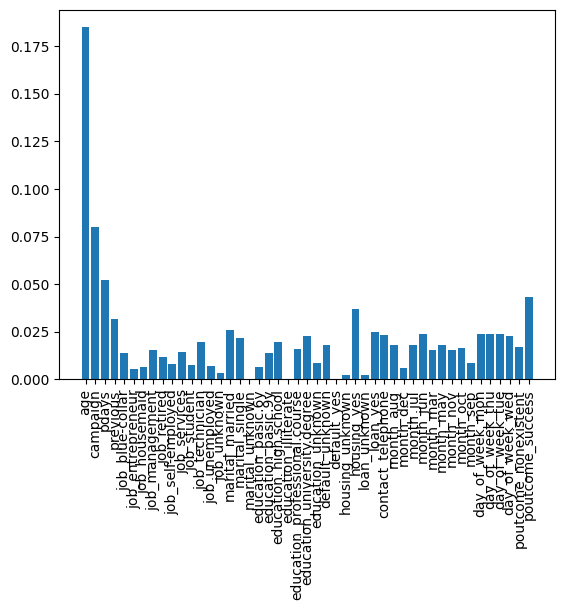

In [14]:
#mean decrease of Gini
importances = randomForestModel.feature_importances_
print(importances)
print(X_encoded.columns)
#plot the importances
import matplotlib.pyplot as plt
plt.bar(X_encoded.columns, importances)
plt.xticks(rotation=90)
plt.show()



e) Nutzen Sie die sieben besten Attribute und erstellen Sie einen neuen Random Forest. 

In [24]:
print(randomForestModel.feature_importances_)

#sort the importances
import numpy as np
indices = np.argsort(importances)[::-1]
print(indices)

[1.84862478e-01 8.02771040e-02 5.24312643e-02 3.18723734e-02
 1.37519336e-02 5.24598667e-03 6.43438084e-03 1.55291941e-02
 1.18517254e-02 8.24487695e-03 1.42577434e-02 7.35973474e-03
 1.97607034e-02 6.86785758e-03 3.59931077e-03 2.60600012e-02
 2.18326822e-02 2.01519353e-04 6.77614304e-03 1.39783695e-02
 1.96425108e-02 3.93726831e-05 1.57479646e-02 2.25534817e-02
 8.48903495e-03 1.79769760e-02 0.00000000e+00 2.42320663e-03
 3.69940602e-02 2.43632791e-03 2.50085789e-02 2.31026059e-02
 1.80666404e-02 5.86008387e-03 1.80836690e-02 2.36568760e-02
 1.55896621e-02 1.78577513e-02 1.56593686e-02 1.65827469e-02
 8.58680741e-03 2.38026982e-02 2.36017937e-02 2.40801193e-02
 2.29319354e-02 1.69900714e-02 4.30402740e-02]
[ 0  1  2 46 28  3 15 30 43 41 35 42 31 44 23 16 12 20 34 32 25 37 45 39
 22 38 36  7 10 19  4  8 40 24  9 11 13 18  6 33  5 14 29 27 17 21 26]


In [35]:
from sklearn.preprocessing import LabelEncoder

# Example data in 'education' column
education_data = ["basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown"]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'education' column using LabelEncoder
data['education_encoded'] = label_encoder.fit_transform(data['education'])

# Display the updated DataFrame with the encoded 'education' column
print(data[['education', 'education_encoded']])


              education  education_encoded
0              basic.9y                  2
1           high.school                  3
2           high.school                  3
3              basic.9y                  2
4     university.degree                  6
...                 ...                ...
4114           basic.6y                  1
4115        high.school                  3
4116        high.school                  3
4117        high.school                  3
4118        high.school                  3

[4119 rows x 2 columns]


f) Plotten Sie zu beiden Classifiern eine ROC Kurve und bestimmen Sie jeweils den AUC-Wert. 

g) Welcher Classifier liefert bessere Vorhersagen und warum? 